In [1]:
import joblib
from imblearn.pipeline import Pipeline as SamplerResolvingPipeline

models_data = {
    "LR - Socio+Demo": joblib.load('nested_cv_search_lr_social+demo.pkl'),
    "XGB - Socio+Demo+Health": joblib.load("nested_cv_optuna_xgb_social+demo+health.pkl"),
    " LR - Socio+Demo+Psy":joblib.load("nested_cv_search_lr_social+demo+psy.pkl"),
    " LR - Full": joblib.load("nested_cv_search_lr_full.pkl"),
    " LR - Lasso": joblib.load("nested_cv_search_lr_lasso.pkl"),
    " XGB - RF_FeatureImportance":joblib.load("nested_cv_optuna_xgb_RF-FeatureImportance.pkl")
}


In [3]:
import pandas as pd

f1_data = []
recall_data = []

for label, result in models_data.items():
    f1_scores = result["test_f1_binary"]
    recall_scores = result["test_recall"]
    
    for score in f1_scores:
        f1_data.append({"Model": label, "Score": score})
    for score in recall_scores:
        recall_data.append({"Model": label, "Score": score})

df_f1 = pd.DataFrame(f1_data)
df_recall = pd.DataFrame(recall_data)


C:\Users\u1246538\AppData\Local\Temp\ipykernel_19052\664964709.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model", y="Score", data=df_f1, palette="Greens", width=0.6, linewidth=1)


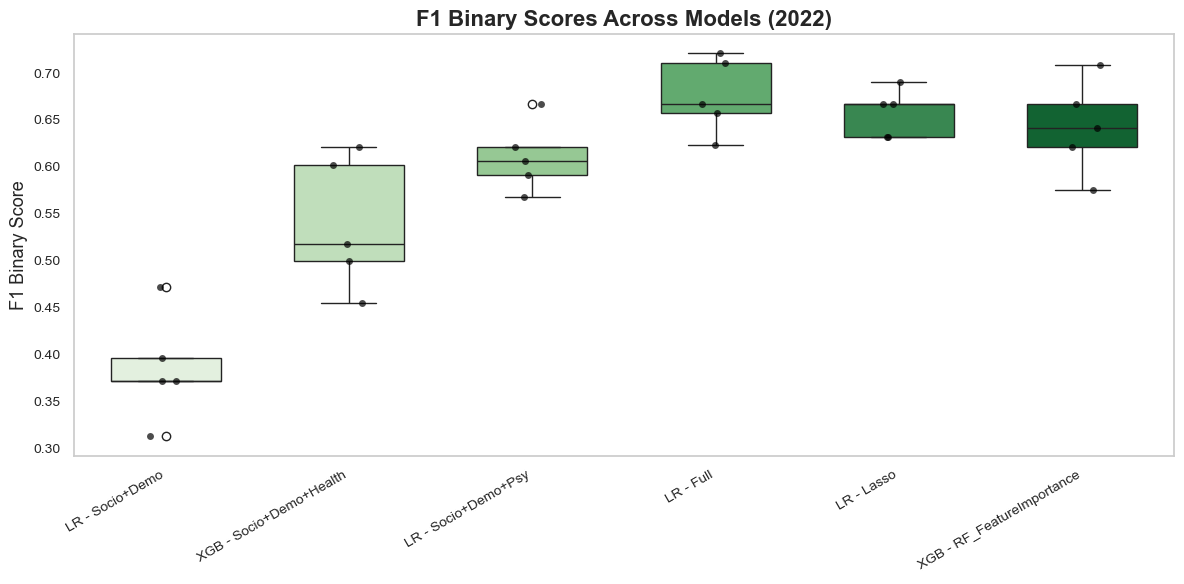

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style but override to remove grid
sns.set(style="whitegrid")
plt.rcParams['axes.grid'] = False  # Disable grid

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Model", y="Score", data=df_f1, palette="Greens", width=0.6, linewidth=1)

# Overlay strip plot
sns.stripplot(x="Model", y="Score", data=df_f1, color='black', size=5, jitter=True, alpha=0.7)

# Format labels and layout
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("F1 Binary Scores Across Models (2022)", fontsize=16, weight='bold')
plt.ylabel("F1 Binary Score", fontsize=13)
plt.xlabel("")
plt.tight_layout()

# Save and show
plt.savefig("boxplot_f1_binary_no_grid_2022.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\u1246538\AppData\Local\Temp\ipykernel_19052\1865914829.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model", y="Score", data=df_recall, palette="Purples", width=0.6, linewidth=1)


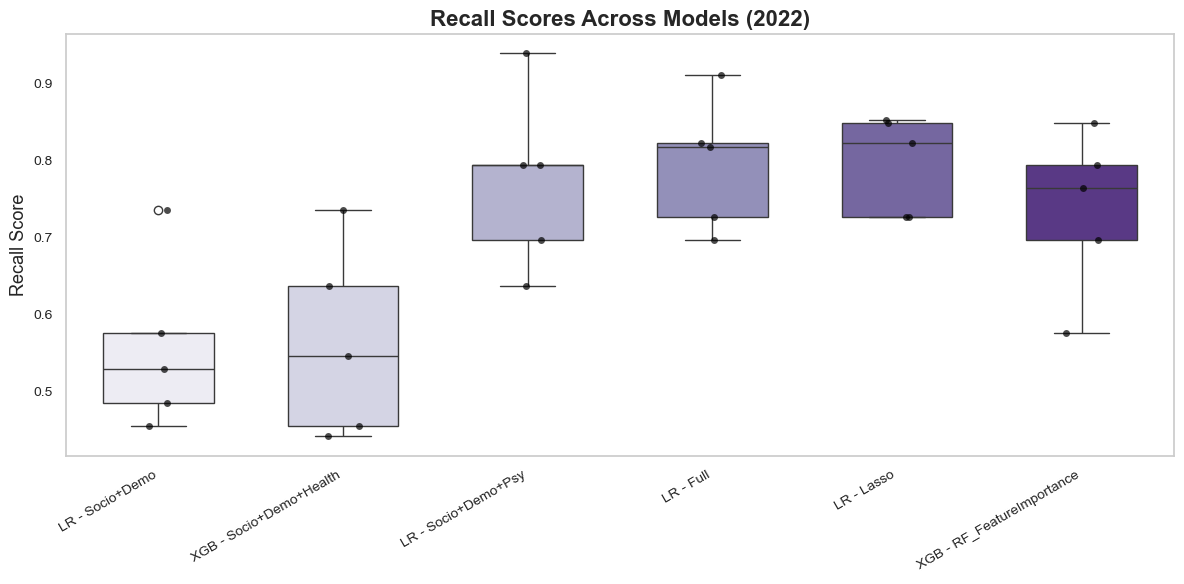

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply consistent style and remove grid
sns.set(style="whitegrid")
plt.rcParams['axes.grid'] = False

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Model", y="Score", data=df_recall, palette="Purples", width=0.6, linewidth=1)

# Overlay jittered points
sns.stripplot(x="Model", y="Score", data=df_recall, color='black', size=5, jitter=True, alpha=0.7)

# Format plot
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Recall Scores Across Models (2022)", fontsize=16, weight='bold')
plt.ylabel("Recall Score", fontsize=13)
plt.xlabel("")
plt.tight_layout()

# Save and show
plt.savefig("boxplot_recall_no_grid_2022.png", dpi=300, bbox_inches='tight')
plt.show()


Paired t-test: t = 10.2388, p = 0.0005


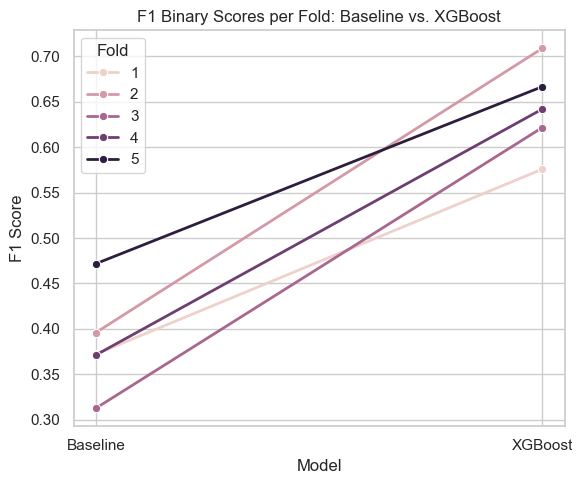

In [11]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# Laad nested CV resultaten
basic_model_cv = joblib.load("nested_cv_search_lr_social+demo.pkl")
best_model_cv = joblib.load("nested_cv_optuna_xgb_RF-FeatureImportance.pkl")

# Extract F1 binary scores
baseline_scores = np.array(basic_model_cv['test_f1_binary'])
xgb_scores = np.array(best_model_cv['test_f1_binary'])

# Paired t-test
t_stat, p_value = ttest_rel(xgb_scores, baseline_scores)
print(f"Paired t-test: t = {t_stat:.4f}, p = {p_value:.4f}")

# Maak DataFrame
df = pd.DataFrame({
    'Fold': range(1, len(baseline_scores)+1),
    'Baseline': baseline_scores,
    'XGBoost': xgb_scores
})

# Omzetten naar lange vorm
df_long = df.melt(id_vars='Fold', var_name='Model', value_name='F1_Score')

# Plot maken
plt.figure(figsize=(6, 5))
sns.set(style="whitegrid")
sns.lineplot(data=df_long, x='Model', y='F1_Score', hue='Fold', marker='o', linewidth=2)
plt.title('F1 Binary Scores per Fold: Baseline vs. XGBoost')
plt.ylabel('F1 Score')
plt.xlabel('Model')
plt.tight_layout()
plt.savefig('paired_f1_scores_plot_2022.png', dpi=300)
plt.show()


In [3]:
from scipy.stats import ttest_rel
import joblib
import numpy as np
from imblearn.pipeline import Pipeline as SamplerResolvingPipeline
# Load nested CV results (update paths as needed)
basic_model_cv = joblib.load("nested_cv_search_lr_social+demo.pkl")
best_model_cv = joblib.load("nested_cv_optuna_xgb_RF-FeatureImportance.pkl")

# Use same metric for comparison (e.g., 'f1_binary' or 'f1_weighted')
metric = 'f1_binary'

# Extract the scores across folds
basic_scores = np.array(basic_model_cv[f'test_{metric}'])
best_scores = np.array(best_model_cv[f'test_{metric}'])

# Sanity check: Make sure both arrays have same length
assert len(basic_scores) == len(best_scores), "Mismatch in number of folds"

# Paired t-test
t_stat, p_value = ttest_rel(best_scores, basic_scores)

# Print results
print(f"Paired t-test results comparing {metric} between models:")
print(f"t-statistic = {t_stat:.4f}")
print(f"p-value = {p_value:.4f}")


Paired t-test results comparing f1_binary between models:
t-statistic = 7.5000
p-value = 0.0017
